# Feature Engineering

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [3]:
# Importing Dataset
data=pd.read_csv('Train_Data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# NUll VALUES or MISSING VALUES
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df=data.copy()
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Splitting features which have missing values into 'Numerical' and 'Categorical'

In [6]:
Missing_numerical=[feature for feature in df.columns if df[feature].dtype!='O' and df[feature].isnull().sum()]
Missing_categorical=[feature for feature in df.columns if feature not in Missing_numerical and df[feature].isnull().sum()]

In [7]:
print(Missing_numerical)
print(Missing_categorical)

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
['Gender', 'Married', 'Dependents', 'Self_Employed']


## Handling missing values in Numerical features

In [8]:
def miss_numerical(df,feature,median):
    df[feature]=df[feature].fillna(median)

In [9]:
for features in Missing_numerical:
    median=df[features].median()
    miss_numerical(df,features,median)

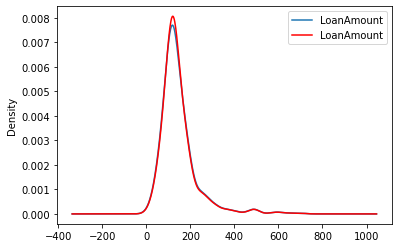

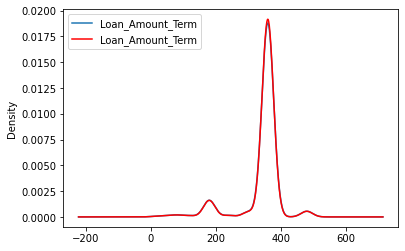

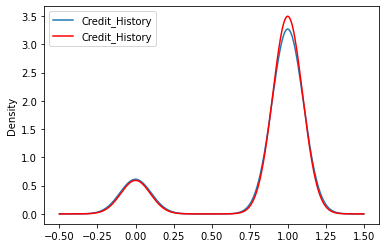

In [10]:
# To check the variance between normal feature and median imputated feature
for feat in Missing_numerical:
    fig=plt.figure()
    wx=fig.add_subplot(111)
    data[feat].plot(kind='kde')
    df[feat].plot(kind='kde',color='red')
    lines,labels=wx.get_legend_handles_labels()
    wx.legend(lines,labels)

## Handling Missing values in Categorical features

In [11]:
def missing_categorical(df,feature):
    df[feature]=df[feature].fillna('Missing')

In [12]:
mi_list=['Gender', 'Married', 'Self_Employed']
for features in mi_list:
    missing_categorical(df,features)

In [13]:
# for 'Dependent' feature, we can go with 'Frequency Imputation'
freq_imputation=df['Dependents'].mode()[0]
df['Dependents']=df['Dependents'].fillna(freq_imputation)

In [14]:
# Now we handlled all null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Handling Outliers

In [15]:
# IQR range for Applicant Income
AI_IQR_value=df['ApplicantIncome'].quantile(0.75)-df['ApplicantIncome'].quantile(0.25)
AI_low_boundary=df['ApplicantIncome'].quantile(0.25)-(1.5*AI_IQR_value)
AI_upper_boundary=df['ApplicantIncome'].quantile(0.75)+(1.5*AI_IQR_value)
print(AI_low_boundary)
print(AI_upper_boundary)

-1498.75
10171.25


In [16]:
# IQR range for CoApplicant Income
CAI_IQR_value=df['CoapplicantIncome'].quantile(0.75)-df['CoapplicantIncome'].quantile(0.25)
CAI_low_boundary=df['CoapplicantIncome'].quantile(0.25)-(1.5*CAI_IQR_value)
CAI_upper_boundary=df['CoapplicantIncome'].quantile(0.75)+(1.5*CAI_IQR_value)
print(CAI_low_boundary)
print(CAI_upper_boundary)

-3445.875
5743.125


In [17]:
df.loc[df['ApplicantIncome']>=10171.25,'ApplicantIncome']=10171.25
df.loc[df['CoapplicantIncome']>=5743.125,'CoapplicantIncome']=5743.125

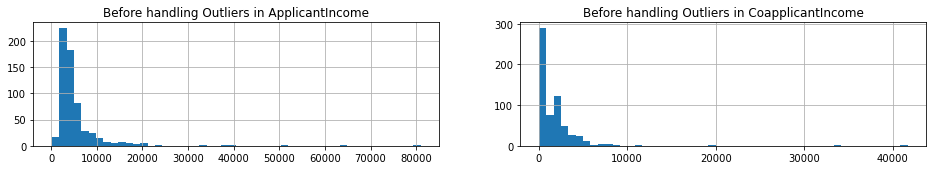

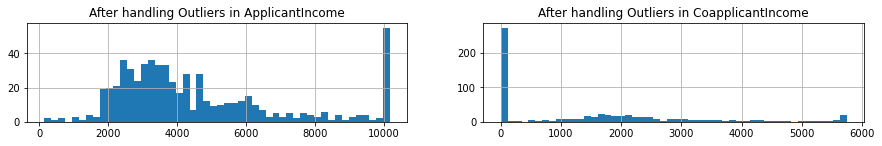

In [18]:
# We cn see that outliers are handled in a good manner
# Before
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
data['ApplicantIncome'].hist(bins=50)
plt.title('Before handling Outliers in ApplicantIncome')
plt.subplot(2,2,2)
data['CoapplicantIncome'].hist(bins=50)
plt.title('Before handling Outliers in CoapplicantIncome')

# After
plt.figure(figsize=(15,4))
plt.subplot(2,2,3)
df['ApplicantIncome'].hist(bins=50)
plt.title('After handling Outliers in ApplicantIncome')
plt.subplot(2,2,4)
df['CoapplicantIncome'].hist(bins=50)
plt.title('After handling Outliers in CoapplicantIncome')
plt.show()

In [19]:
# handling outliers in 'Loan Amount'
LA_low = df['LoanAmount'].mean()- 3*df['LoanAmount'].std()
LA_upper = df['LoanAmount'].mean()+ 3*df['LoanAmount'].std()
print(LA_low)
print(LA_upper)

-106.56925714453578
398.0741431380211


In [20]:
df.loc[df['LoanAmount']>=398.0741431380211,'LoanAmount']=398.0741431380211

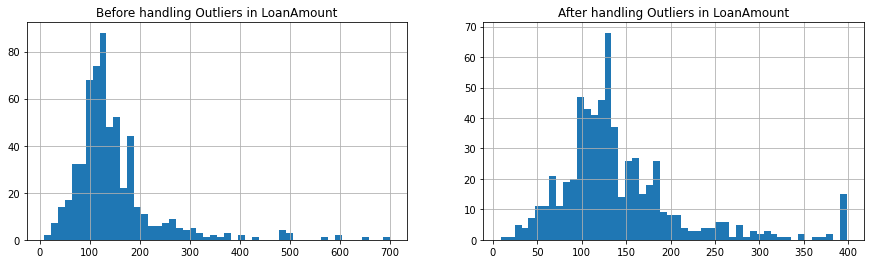

In [21]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
data['LoanAmount'].hist(bins=50)
plt.title('Before handling Outliers in LoanAmount')
plt.subplot(1,2,2)
df['LoanAmount'].hist(bins=50)
plt.title('After handling Outliers in LoanAmount')
plt.show()

## Encoding Thechniques

In [22]:
# categorical features
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [23]:
fine_df=df.copy()

In [24]:
fine_df=fine_df.drop(['Loan_ID'],axis=1)

In [25]:
# deleting loan_id column
del categorical_features[0]

In [26]:
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [27]:
for i in categorical_features:
    print(i,': ')
    print(fine_df[i].value_counts())
    print('\n')

Gender : 
Male       489
Female     112
Missing     13
Name: Gender, dtype: int64


Married : 
Yes        398
No         213
Missing      3
Name: Married, dtype: int64


Dependents : 
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Education : 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Self_Employed : 
No         500
Yes         82
Missing     32
Name: Self_Employed, dtype: int64


Property_Area : 
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Loan_Status : 
Y    422
N    192
Name: Loan_Status, dtype: int64




In [28]:
fine_df['Loan_Status']=pd.get_dummies(fine_df['Loan_Status'],drop_first=True)
fine_df['Education']=pd.get_dummies(fine_df['Education'],drop_first=True)
fine_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,0,No,5849.0,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,0,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,0,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,1,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,0,No,6000.0,0.0,141.0,360.0,1.0,Urban,1


In [29]:
def target_guide(fine_df,var1,var2):
    fine_df[var1]=fine_df[var1].astype(str).str[:2]
    target_var=fine_df.groupby([var1])[var2].mean().sort_values().index
    dict_var={k:i for i,k in enumerate(target_var,0)}
    fine_df[var1]=fine_df[var1].map(dict_var)

In [30]:
features=['Gender','Married','Dependents','Self_Employed','Property_Area']
for i in features:
    target_guide(fine_df,i,'Loan_Status')

In [31]:
fine_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,0,2,0,1,5849.0,0.0,128.0,360.0,1.0,1,1
1,2,1,0,0,1,4583.0,1508.0,128.0,360.0,1.0,0,0
2,2,1,2,0,0,3000.0,0.0,66.0,360.0,1.0,1,1
3,2,1,2,1,1,2583.0,2358.0,120.0,360.0,1.0,1,1
4,2,0,2,0,1,6000.0,0.0,141.0,360.0,1.0,1,1


# Feature Selection

In [32]:
X=fine_df.drop(['Loan_Status'],axis=1)
y=fine_df['Loan_Status']

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
Req_features=ExtraTreesClassifier()
Req_features.fit(X,y)

ExtraTreesClassifier()

In [34]:
SelectedFeatures=Req_features.feature_importances_
RequiredFeatures=pd.Series(SelectedFeatures,index=X.columns)
RequiredFeatures.nlargest(10)

Credit_History       0.276254
LoanAmount           0.173365
ApplicantIncome      0.164865
CoapplicantIncome    0.105395
Dependents           0.058399
Loan_Amount_Term     0.049245
Property_Area        0.046191
Self_Employed        0.042821
Married              0.030545
Gender               0.030221
dtype: float64

<AxesSubplot:>

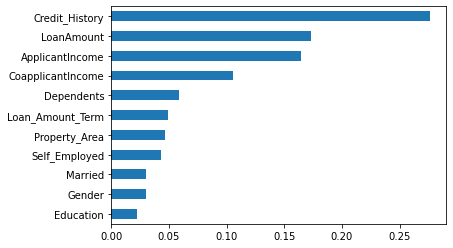

In [35]:
RequiredFeatures.sort_values(ascending=True).plot(kind='barh')

In [36]:
final_df=[feature for feature in X.columns if feature not in RequiredFeatures.nlargest(5)]
final_df

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Property_Area']

In [37]:
final_data=fine_df.drop(['Education','Gender','Married','Self_Employed','Loan_Amount_Term','Property_Area'],axis=1)
final_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,2,5849.0,0.0,128.0,1.0,1
1,0,4583.0,1508.0,128.0,1.0,0
2,2,3000.0,0.0,66.0,1.0,1
3,2,2583.0,2358.0,120.0,1.0,1
4,2,6000.0,0.0,141.0,1.0,1


# Feature Scaling

In [38]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(final_data), columns=final_data.columns)

In [39]:
scaled_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0.0,0.698029,-0.517358,0.000000,0.0,0.0
1,-2.0,0.264096,0.139079,0.000000,0.0,-1.0
2,0.0,-0.278492,-0.517358,-0.961240,0.0,0.0
3,0.0,-0.421422,0.509087,-0.124031,0.0,0.0
4,0.0,0.749786,-0.517358,0.201550,0.0,0.0


# Model Evaluation

In [40]:
X=scaled_data.drop(['Loan_Status'],axis=1)
y=scaled_data['Loan_Status']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [42]:
print(X_train.shape)
print(X_test.shape)

(429, 5)
(185, 5)


In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 351 to 559
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         429 non-null    float64
 1   ApplicantIncome    429 non-null    float64
 2   CoapplicantIncome  429 non-null    float64
 3   LoanAmount         429 non-null    float64
 4   Credit_History     429 non-null    float64
dtypes: float64(5)
memory usage: 20.1 KB


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [45]:
log_classifier=LogisticRegression()
log_classifier.fit(X_train,y_train)
log_pred=log_classifier.predict(X_test)

In [46]:
dt_classifier=DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)
dt_pred=dt_classifier.predict(X_test)

In [48]:
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train,y_train)
rf_pred=rf_classifier.predict(X_test)

In [49]:
svm_classifier=SVC()
svm_classifier.fit(X_train,y_train)
svm_pred=svm_classifier.predict(X_test)

In [50]:
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train,y_train)
ada_pred=ada_classifier.predict(X_test)

In [51]:
xgb_classifier=XGBClassifier()
xgb_classifier.fit(X_train,y_train)
xgb_pred=xgb_classifier.predict(X_test)

C:\Users\sindhu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:17:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [52]:
from sklearn.metrics import accuracy_score
models=np.array(['LogisticRegression','DecisionTreeClassifier','SVC','AdaBoostClassifier','XGBClassifier','RandomForestClassifier'])
scores=np.array([accuracy_score(log_pred,y_test),accuracy_score(dt_pred,y_test),accuracy_score(svm_pred,y_test),
                accuracy_score(ada_pred,y_test),accuracy_score(xgb_pred,y_test),accuracy_score(rf_pred,y_test)])

In [53]:
df={'model':models,'scores':scores}
df

{'model': array(['LogisticRegression', 'DecisionTreeClassifier', 'SVC',
        'AdaBoostClassifier', 'XGBClassifier', 'RandomForestClassifier'],
       dtype='<U22'),
 'scores': array([0.82702703, 0.6972973 , 0.82162162, 0.82162162, 0.78918919,
        0.8       ])}

<BarContainer object of 6 artists>

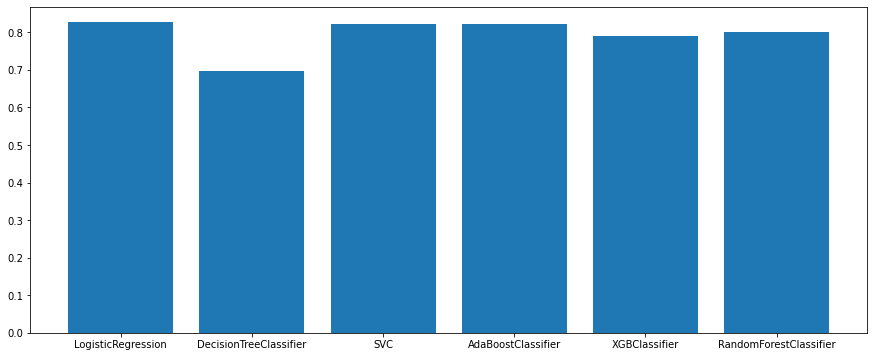

In [54]:
plt.figure(figsize=(15,6))
plt.bar(models,scores)

- In this case LogisticResgression and AdaBoostClassification algorithms gives good accuracy

# HyperParameter Tuning

In [63]:
# logisticRegression
penalty=['l1', 'l2', 'elasticnet', 'none']
solver=['newton-cg','lbfgs','liblinear','sag','saga']
max_iter=[int(x) for x in np.linspace(100,2000,10)]

In [64]:
parameters={'penalty':penalty,'solver':solver,'max_iter':max_iter}

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
classifier=LogisticRegression()
RSCV_Classifier=RandomizedSearchCV(estimator=classifier,param_distributions=parameters,cv=5,n_iter=100,random_state=100)

In [67]:
RSCV_Classifier.fit(X_train,y_train)

C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection

C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection

C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sindhu\

C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection

C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\m

C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection

C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_sel

C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\m

C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\m

C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\m

C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. T

C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. T

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'max_iter': [100, 311, 522, 733, 944,
                                                     1155, 1366, 1577, 1788,
                                                     2000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100)

In [68]:
print(RSCV_Classifier.best_estimator_)
print(RSCV_Classifier.best_params_)

LogisticRegression(max_iter=1366)
{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1366}


In [69]:
pred_var=RSCV_Classifier.best_estimator_
y_prediction=pred_var.predict(X_test)

In [70]:
print(accuracy_score(y_test,y_prediction))

0.827027027027027


In [71]:
# random forest
n_estimators=[int(x) for x in np.linspace(start=200, stop=2000, num=10)]
criterion=['gini', 'entropy']
min_samples_split=[1,3,4,5,7,9]
min_samples_leaf=[1,2,4,6,8]
max_features=["auto", "sqrt", "log2"]
max_depth=[int(x) for x in np.linspace(10,1000,10)]

random_grid={'n_estimators':n_estimators,
            'criterion':criterion,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'max_features':max_features,
            'max_depth':max_depth}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'criterion': ['gini', 'entropy'], 'min_samples_split': [1, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000]}


In [72]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,random_state=100,
                               n_jobs=-1,verbose=2)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\sindhu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.78554779 0.78554779 0.79487179 0.78787879 0.79487179
 0.78787879        nan 0.78321678 0.78554779        nan 0.78554779
 0.78787879 0.79487179 0.78554779 0.78088578 0.79020979 0.78554779
        nan        nan 0.79020979 0.78787879 0.78787879 0.79020979
        nan        nan 0.78787879 0.79254079 0.7972028  0.78787879
 0.78787879        nan 0.79254079 0.79020979        nan 0.79254079
 0.7972028  0.7972028  0.79020979 0.79020979 0.79487179 0.79020979
        nan 0.78787879 0.79020979 0.78787879 0.78554779 0.79254079
 0.78554779 0.79020979        nan        nan        nan 0.79020979
 0.78787879 0.78787879 0.77855478 0.79020979 0.79020979 0.77622378
 0.7972028  0.78787879 0.77622378 0.79487179        nan        nan
 0.79487179 0.79020979 0.7972028  0.79254079 0.79020979 0.78554779
 0.7972028  0.78321678 0.78787879 0.79254079 0.77156

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [73]:
rf_random_best=rf_randomcv.best_estimator_
rf_randomcv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 9,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 230,
 'criterion': 'entropy'}

In [74]:
y_prediction=rf_random_best.predict(X_test)
print(accuracy_score(y_test,y_prediction))

0.827027027027027


- From the above, we got 82% of accuracy for all types of models!